# Storytelling Data Visualization on Exchange Rates

## Introducing the Dataset

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

Let's start by reading in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
exchange_rates = pd.read_csv('../Datasets/euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [5]:
exchange_rates.shape

(5699, 41)

## Data Cleaning

Before we start creating data visualizations, we'll need to do a bit of data cleaning. 

Below, we do the following:

- We rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
- We change the Time column to a datetime data type.
- We sort the values by Time in ascending order.
- We reset the index (and drop the initial index).

In [6]:
def clean(col):
    return col.replace(']', '').replace('[', '').replace("\\", ' ').replace(':', '').strip().replace(' ', '_')
exchange_rates.columns = [clean(col) for col in exchange_rates.columns]

In [7]:
exchange_rates.rename({'Period_Unit':'Time'},
                     axis=1, inplace=True)


In [8]:
exchange_rates = exchange_rates.sort_values(by='Time').reset_index(drop=True)

In [9]:
euro_to_dollar = exchange_rates.loc[:,['US_dollar', 'Time']]

In [10]:
exchange_rates['US_dollar'].value_counts()

US_dollar
-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: count, Length: 3528, dtype: int64

In [11]:
euro_to_dollar = euro_to_dollar.loc[~euro_to_dollar['US_dollar'].str.contains('-')]

In [12]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [14]:
euro_to_dollar['Time'] = pd.to_datetime(euro_to_dollar['Time'])
euro_to_dollar.head()

,US_dollar,Time
0,1.1789,1999-01-04
1,1.1790,1999-01-05
2,1.1743,1999-01-06
3,1.1632,1999-01-07
4,1.1659,1999-01-08


## Rolling Mean

Let's generate a line plot to visualize the evolution of the euro-dollar exchange rate.

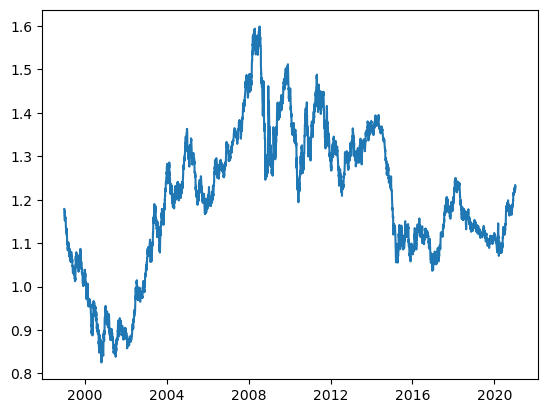

In [16]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).

To understand how a rolling mean works, let's say we have ten values for ten consecutive days.



In [17]:
values = pd.DataFrame()
values['daily_values'] = pd.Series(range(1,20,2))
values

,daily_values
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


The value of the second day is 3. Let's say we rather want that value to be the mean between the value of the first day and the value of the second day. The value of the first day is 1, the value of the second day is 3, and their arithmetical mean is 2.

Let's now say we want the same for each day: the value is the mean between the value of that day and the value of the previous day. For the third day, the value is the mean between the third and the second day. For the seventh day, the value is the mean between the seventh and the sixth day, and so on.

We can calculate the mean for each day using the [.Series.rolling().mean() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) — the only exception is the first day, which doesn't have a previous day.

In [23]:
values['rolling_mean_2'] = values['daily_values'].rolling(window=2).mean()
values

,daily_values,rolling_mean_2
0,1,NaN
1,3,2.0
2,5,4.0
3,7,6.0
4,9,8.0
5,11,10.0
6,13,12.0
7,15,14.0
8,17,16.0
9,19,18.0


We calculated the rolling mean using values from two days — the current day and the previous day. We call the number of days used in the calculation the rolling window (or moving window). If the rolling window is three, then we calculate the mean between the value of the current day and the values of the previous two days.

In [26]:
values['rolling_mean_3'] = values['daily_values'].rolling(3).mean()
values['rolling_mean_5'] = values['daily_values'].rolling(5).mean()
values

,daily_values,rolling_mean_2,rolling_mean_3,rolling_mean_5
0,1,NaN,NaN,NaN
1,3,2.0,NaN,NaN
2,5,4.0,3.0,NaN
3,7,6.0,5.0,NaN
4,9,8.0,7.0,5.0
5,11,10.0,9.0,7.0
6,13,12.0,11.0,9.0
7,15,14.0,13.0,11.0
8,17,16.0,15.0,13.0
9,19,18.0,17.0,15.0


The rolling window can take various values — some common values include seven (one week), 30 (one month), 50 or 100 days, or 365 days (one year).

Below, we see how our line plot changes visually as we increase the rolling window. The window gets larger, and the line becomes smoother. This increases the data-ink ratio, and it can be useful if we want the audience to focus only on long-term trends.

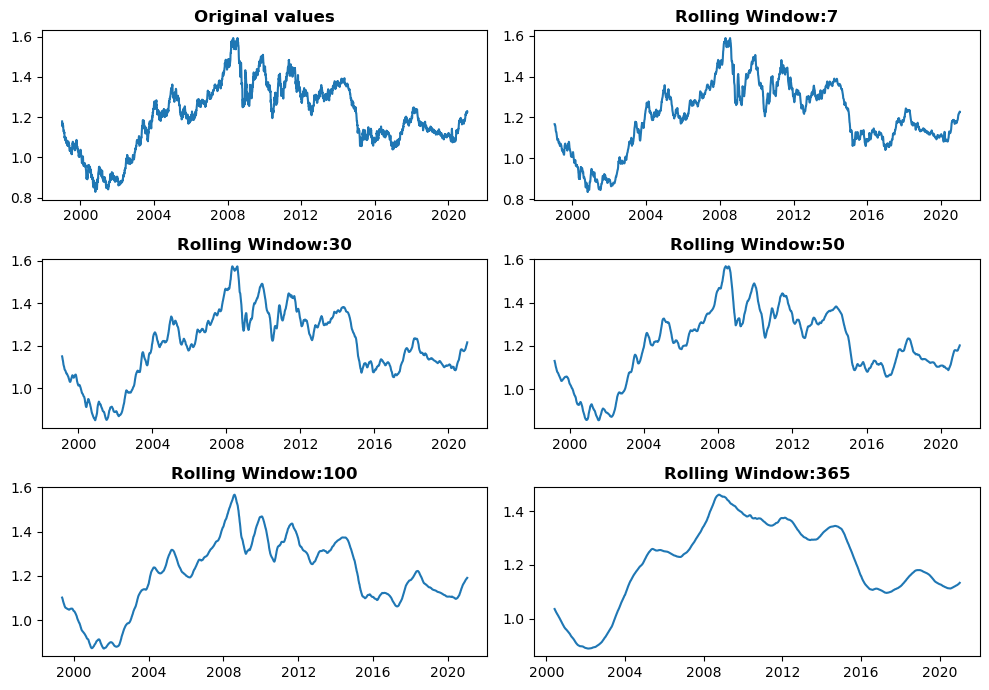

In [47]:
plt.subplots(nrows=3, ncols=2, figsize=(10, 7))
plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Time'],
            euro_to_dollar['US_dollar'].rolling(2).mean())
plt.title('Original values', weight='bold')

windows = [7, 30, 50, 100, 365]

for i, w in enumerate(windows):
    plt.subplot(3, 2, i + 2)
    plt.plot(euro_to_dollar['Time'],
            euro_to_dollar['US_dollar'].rolling(w).mean())
    plt.title(f'Rolling Window:{w}', weight='bold')
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()
#     plt.subplots_adjust(hspace=0.4)

Let's calculate the rolling means for the US_dollar column using a moving window of 30 days.

In [28]:
euro_to_dollar['rolling_mean']= euro_to_dollar['US_dollar'].rolling(30).mean()

In [48]:
 euro_to_dollar

,US_dollar,Time,rolling_mean
0,1.1789,1999-01-04,NaN
1,1.1790,1999-01-05,NaN
2,1.1743,1999-01-06,NaN
3,1.1632,1999-01-07,NaN
4,1.1659,1999-01-08,NaN
...,...,...,...
5694,1.2296,2021-01-04,1.211170
5695,1.2271,2021-01-05,1.212530
5696,1.2338,2021-01-06,1.213987
5697,1.2276,2021-01-07,1.215357


## Coming Up With an Idea

Here are a few story ideas for our data:

- We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
- We show how the euro-dollar rate changed during the 2007-2008's financial crisis. We can also show the data for 2016 and 2009 for comparison. We can use a line plot.
- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

## Storytelling Data Visualization Examples

### Financial Crisis Example

In [49]:
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]